<a href="https://colab.research.google.com/github/justhussh/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Abdullah Azzam**

**NIM : 2141720073**

**No. Absen : 01**

**Kelas : TI - 3E**

In [4]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Tugas Praktikum**

1. **Buat Gamma Correction sesuai dengan petunjuk berikut**

  Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 10


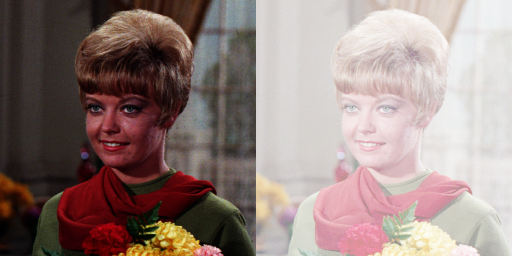

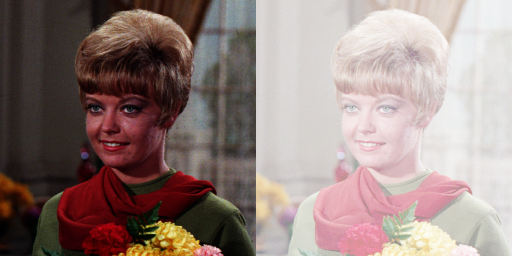

In [ ]:
# -----------------------------------------------------
print(' Gamma Correction pada citra ')
print('-------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)
cv2_imshow(final_frame)

2. **Buat Simulasi Image Depth**

  Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27
 = 128, dst.
Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

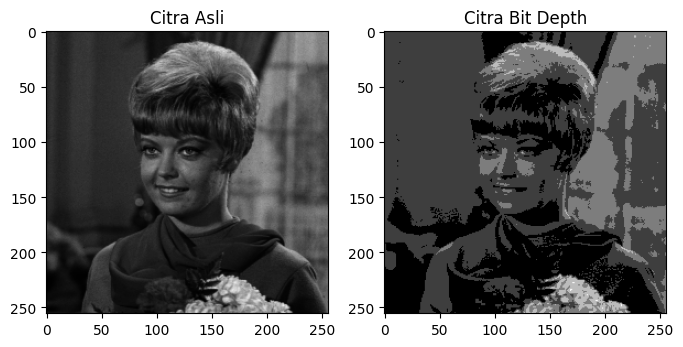

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

original = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

bit_depth=2

level = 255/(2**bit_depth)-1

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

# Menampilkan gambar
plt.figure(figsize=(8, 6))

# Gambar asli
plt.subplot(121)
plt.imshow(original, cmap='gray', vmin=0, vmax=255)
plt.title('Citra Asli')
plt.axis('on')

# depth_image
plt.subplot(122)
plt.imshow(depth_image, cmap='gray', vmin=0, vmax=255)
plt.title(f'Citra Bit Depth')
plt.axis('on')

plt.show()

3. **Buat modul Average Denoising**

  Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya.
  Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

Nilai PSNR adalah 27.587465848836334 (dB)


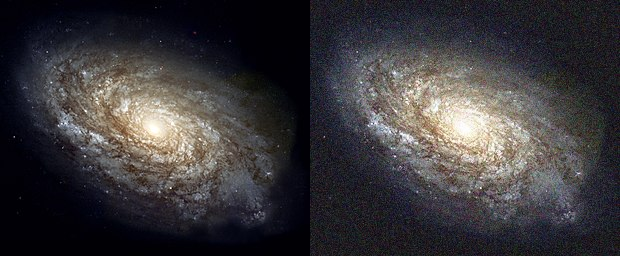

In [14]:
# 1. Jumlah Citra di Average = 5

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[2]
noise_number = 4
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

4. **Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya**

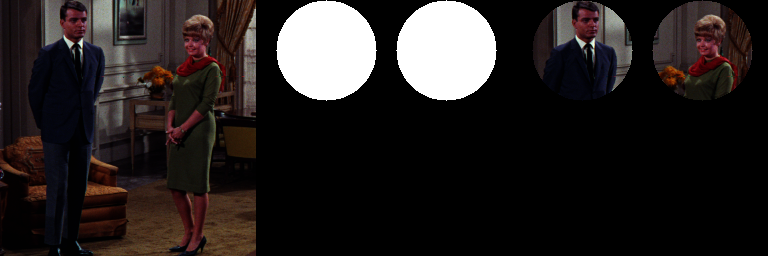

In [ ]:
import cv2
import numpy as np

# Load the original image
couple_image = cv2.imread('/content/drive/MyDrive/PCVK/images/couple.tiff')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

# gambar lingkaran mask yang pertama
mask = cv2.circle(mask, (70, 50), 50, (255,255,255), thickness=-1)

# gambar lingkaran mask yang kedua
mask1 = cv2.circle(mask, (190, 50), 50, (255,255,255), thickness=-1)

# menggunakan bitwise 'AND' operator untuk ngeoverlay lingkaran pada gambar aslinya
result_image = couple_image & mask

# Tampilkan
couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)

5. **Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.**

**OR**

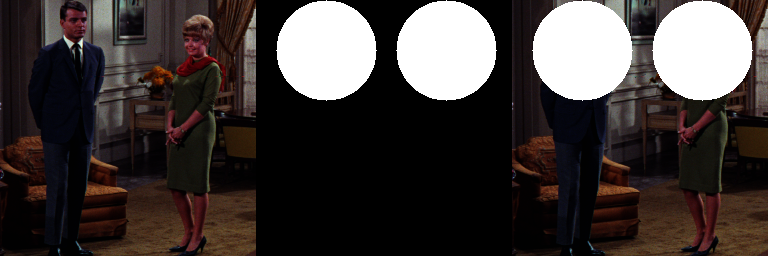

In [ ]:

import cv2
import numpy as np

# Load the original image
couple_image = cv2.imread('/content/drive/MyDrive/PCVK/images/couple.tiff')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

# gambar lingkaran mask yang pertama
mask = cv2.circle(mask, (70, 50), 50, (255,255,255), thickness=-1)

# gambar lingkaran mask yang kedua
mask1 = cv2.circle(mask, (190, 50), 50, (255,255,255), thickness=-1)

# menggunakan bitwise 'OR' operator untuk ngeoverlay lingkaran pada gambar aslinya
result_image = couple_image | mask

# Tampilkan
couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)

**Not**

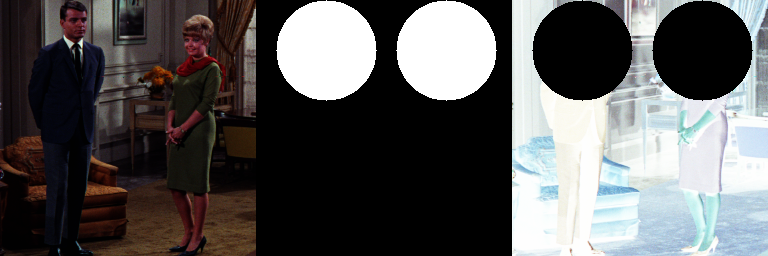

In [ ]:
import cv2
import numpy as np

# Load the original image
couple_image = cv2.imread('/content/drive/MyDrive/PCVK/images/couple.tiff')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

# gambar lingkaran mask yang pertama
mask = cv2.circle(mask, (70, 50), 50, (255,255,255), thickness=-1)

# gambar lingkaran mask yang kedua
mask1 = cv2.circle(mask, (190, 50), 50, (255,255,255), thickness=-1)

# menggunakan bitwise 'NOT' operator untuk ngeoverlay lingkaran pada gambar aslinya
result_image = ~couple_image & ~mask

# Tampilkan
couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)

**AND**

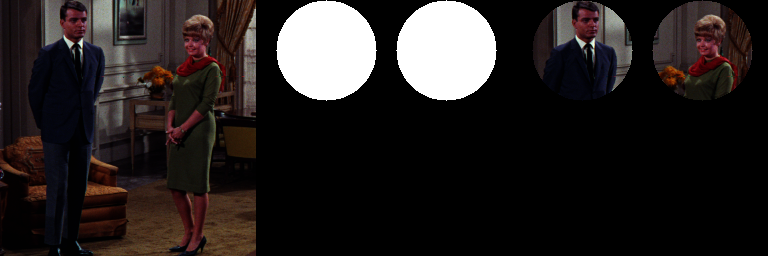

In [ ]:
import cv2
import numpy as np

# Load the original image
couple_image = cv2.imread('/content/drive/MyDrive/PCVK/images/couple.tiff')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

# gambar lingkaran mask yang pertama
mask = cv2.circle(mask, (70, 50), 50, (255,255,255), thickness=-1)

# gambar lingkaran mask yang kedua
mask1 = cv2.circle(mask, (190, 50), 50, (255,255,255), thickness=-1)

# menggunakan bitwise 'AND' operator untuk ngeoverlay lingkaran pada gambar aslinya
result_image = couple_image & mask

# Tampilkan
couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)

**NAND**

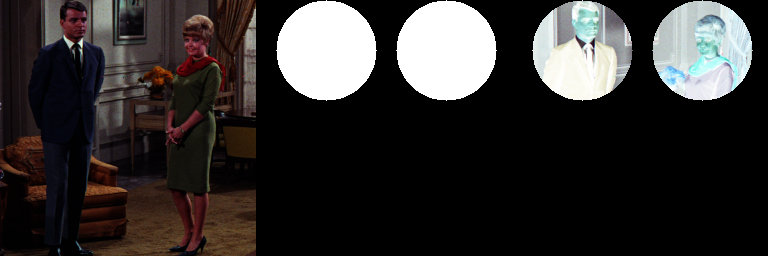

In [ ]:
import cv2
import numpy as np

# Load the original image
couple_image = cv2.imread('/content/drive/MyDrive/PCVK/images/couple.tiff')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

# gambar lingkaran mask yang pertama
mask = cv2.circle(mask, (70, 50), 50, (255,255,255), thickness=-1)

# gambar lingkaran mask yang kedua
mask1 = cv2.circle(mask, (190, 50), 50, (255,255,255), thickness=-1)

# menggunakan bitwise 'NAND' operator untuk ngeoverlay lingkaran pada gambar aslinya
result_image = ~couple_image & mask

# Tampilkan
couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)

**XOR**

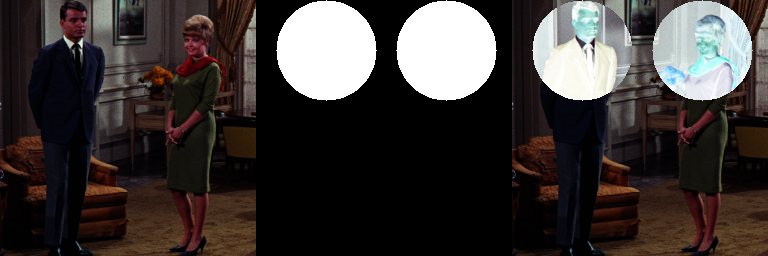

In [ ]:
import cv2
import numpy as np

# Load the original image
couple_image = cv2.imread('/content/drive/MyDrive/PCVK/images/couple.tiff')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

# gambar lingkaran mask yang pertama
mask = cv2.circle(mask, (70, 50), 50, (255,255,255), thickness=-1)

# gambar lingkaran mask yang kedua
mask1 = cv2.circle(mask, (190, 50), 50, (255,255,255), thickness=-1)

# menggunakan bitwise 'NAND' operator untuk ngeoverlay lingkaran pada gambar aslinya
result_image = couple_image ^ mask

# Tampilkan
couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)